In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=e52cf0cae7772d2e2b9b0e3b4b37e3e9e684d8c491a72d82571dc701c509ef4c
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
# Carregar o arquivo CSV no DataFrame
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Converter 'Gender' em valores binários
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Selecionar as colunas para o SOM
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar os dados para o intervalo [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Definir o SOM (exemplo de grid 10x10 com 4 entradas)
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=200)  # Treinamento com 200 iterações


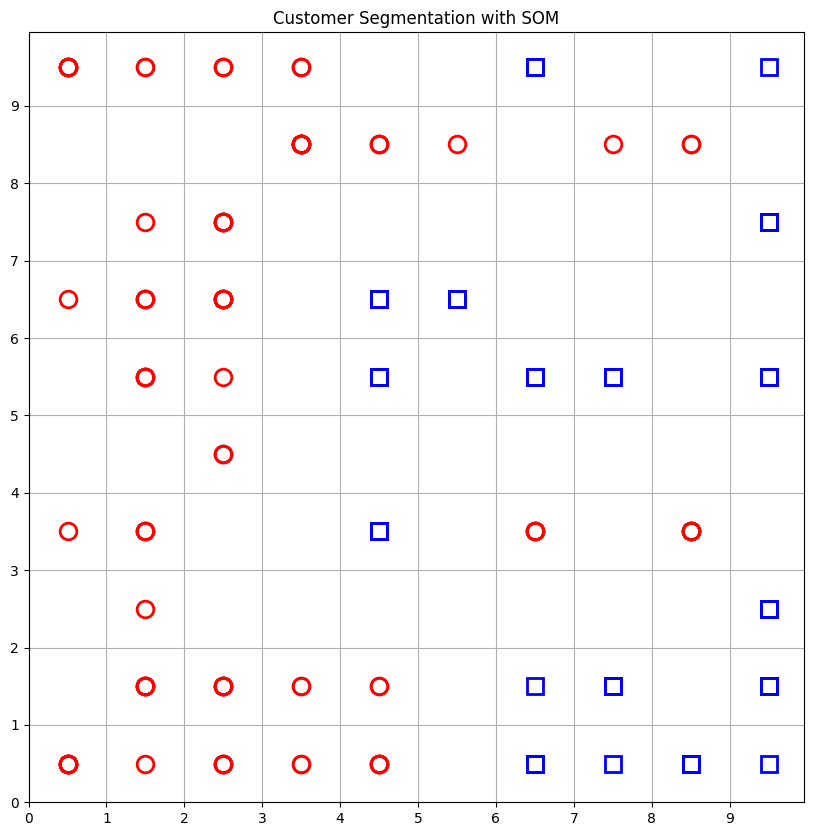

In [ ]:
# Definir cores e marcadores para cada gênero
colors = ['r', 'b']  # vermelho para feminino, azul para masculino
markers = ['o', 's']  # círculo para feminino, quadrado para masculino

plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    # Encontrar o neurônio vencedor para cada cliente
    winner = som.winner(x)
    # Plota o ponto no SOM com marcador e cor baseados no gênero
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, markers[df['Gender'][i]],
             markerfacecolor='None',
             markeredgecolor=colors[df['Gender'][i]],
             markersize=12,
             markeredgewidth=2)

# Configurar grid e exibir o gráfico
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.grid()
plt.title("Customer Segmentation with SOM")
plt.show()
